Visualizations of data produced from Maeda model and Kwang Kim's relokate package

author : Jessica Gaines

date : 07-2020

0.003989458084106445
1.767320883e-314
1.2380092047313e-311
TTCL = 70.0
TTCD = 9.422874872496642
TBCL = 85.8
TBCD = 8.314417159699929
LA = 19.29706573486328
LP = 11.143736839294434


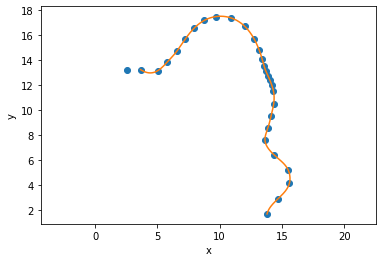

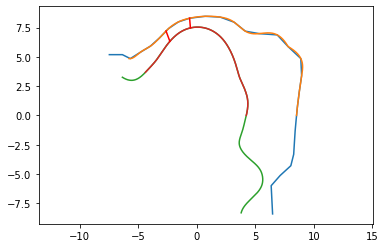

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.patches import Polygon
from makeTrainingData import find_artic_params
import maeda as mda
from mpl_toolkits.axes_grid1 import make_axes_locatable
color_list = ['red','orange','yellow','green','blue','purple','black']

TC = np.array([1,1,0,0], 'float32')
PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
AM = np.array([0,0,0,0,0,0,0], 'float32') 
anc = 0.0
#formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM,anc)
palateCon=np.loadtxt("palate_contour.txt")
pCon_x = palateCon[0,]
pCon_y = palateCon[1,]
#find_artic_params(internal_x,internal_y,external_x,external_y,palateCon,plot=True,verbose=True)

In [7]:
# import data into dataframe and verify dataframe dimensions
def read_in_data(path):
    AMs = pd.read_csv(path + '/AM_0.csv',header=None)
    AMs.columns = ['jaw','tongue','shape','apex','lip height','lip protrusion','larynx'][0:AMs.shape[1]]
    formants = pd.read_csv(path + '/formants_0.csv',header=None,names=range(5))
    task_params = pd.read_csv(path + '/vocal_tract_0.csv',header=None,names=['TTCL','TTCD','TBCL','TBCD','LA','LP'])
    i = 1
    while True:
        try:
            AM = pd.read_csv(path + '/AM_' + str(i) + '.csv',header=None,names=AMs.columns)
            formant = pd.read_csv(path + '/formants_' + str(i) + '.csv',header=None,names=formants.columns)
            task = pd.read_csv(path + '/vocal_tract_' + str(i) + '.csv',header=None,names=task_params.columns)
        except:
            break
        AMs = AMs.append(AM)
        formants = formants.append(formant)
        task_params = task_params.append(task)
        i += 1 
    AMs.reset_index(drop=True, inplace=True)
    formants.reset_index(drop=True, inplace=True)
    task_params.reset_index(drop=True, inplace=True)
    print(AMs.shape)
    print(formants.shape)
    print(task_params.shape)
    return AMs,formants,task_params

# read in dataset from random walks _rw
read_path = 'training_data_rw_long'
write_path = 'JASA-EL2021/new_fig2/'
AMs_rw,formants_rw,task_params_rw = read_in_data(read_path)
task_params_rw = task_params_rw[task_params_rw['TTCD'] >= 5]
task_params_rw = task_params_rw[task_params_rw['TBCD'] >= 5]
AMs_rw = AMs_rw.iloc[task_params_rw.index,:]
formants_rw = formants_rw.iloc[task_params_rw.index,:]
task_params_rw.reset_index(drop=True,inplace=True)
AMs_rw.reset_index(drop=True,inplace=True)
formants_rw.reset_index(drop=True,inplace=True)
print(task_params_rw.shape)
print(AMs_rw.shape)
print(formants_rw.shape)
check = task_params_rw[task_params_rw['TTCL'] > 69]
check[check['TBCL']<76]

(1200050, 6)
(1200050, 5)
(1200050, 6)
(1007104, 6)
(1007104, 6)
(1007104, 5)


,TTCL,TTCD,TBCL,TBCD,LA,LP
28701,70.0,7.968503,75.0,8.018936,11.127501,18.122940
92695,69.8,6.585292,75.0,6.682539,13.435068,16.046028
92696,70.0,5.655848,75.0,5.733198,14.903116,15.681574
120367,69.8,7.588702,75.1,7.639502,13.824978,6.076508
120368,69.8,6.460680,75.0,6.560588,13.175192,5.985708
202261,69.8,6.748009,75.0,6.842922,19.026709,9.376745
202265,70.0,5.385167,75.1,5.343503,16.371527,7.794533
206582,69.8,6.071663,75.0,6.147631,28.089609,21.432080
322257,70.0,5.436871,75.0,5.439465,16.737852,19.378932
593957,69.8,5.992312,75.1,6.040582,13.375826,19.446714


In [3]:
male_formant_dict = {'i':[270,2290,3010],
                     'I':[390,1990,2550],
                     'ε':[530,1840,2480],
                     'æ':[660,1720,2410],
                     'ɑ':[730,1090,2440],
                     'ɔ':[570,840,2410],
                     'U':[440,1020,2240],
                     'u':[300,870,2240],
                     'ʌ':[640,1190,2390],
                     'ɜ':[490,1350,1690]
                    }

def formant_graph(df,which_formants=[2,1],title='',male_vowels=None,female_vowels=None):
    sns.set_context("paper", font_scale=2)
    fig = sns.jointplot(x=which_formants[0]-1,y=which_formants[1]-1,data=df,kind='kde',color='gray')
    fig.plot_joint(plt.scatter, c="black", s=2, linewidth=1, marker=".",alpha=0.5)
    fig.fig.suptitle(title)
    ax = fig.fig.axes[0]
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_facecolor('#6B8F71')
    s = 20
    if male_vowels:
        color = '#ECC8AE'
        for key in male_vowels.keys():
            vals = male_vowels.get(key)
            male_vowels_x = vals[which_formants[0]-1]
            male_vowels_y = vals[which_formants[1]-1]
            #plt.scatter(male_vowels_x,male_vowels_y,color=color,label='Avg. Male',s=15)
            plt.annotate(key,(male_vowels_x,male_vowels_y),color=color,size=15,weight='bold')
    fig.set_axis_labels('F'+str(which_formants[0]) + '(Hz)', 'F' + str(which_formants[1]) + '(Hz)')
    plt.savefig(write_path + 'F' + str(which_formants[1]) +'-' + 'F' + str(which_formants[0]) + '.png', format='png', dpi=600)
    plt.show()
#formant_graph(formants_rw,which_formants=[2,1],male_vowels=male_formant_dict)
#formant_graph(formants_rw,which_formants=[3,2],male_vowels=male_formant_dict)
#formant_graph(formants_rw,which_formants=[3,1],male_vowels=male_formant_dict)

C:\Users\JLG\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



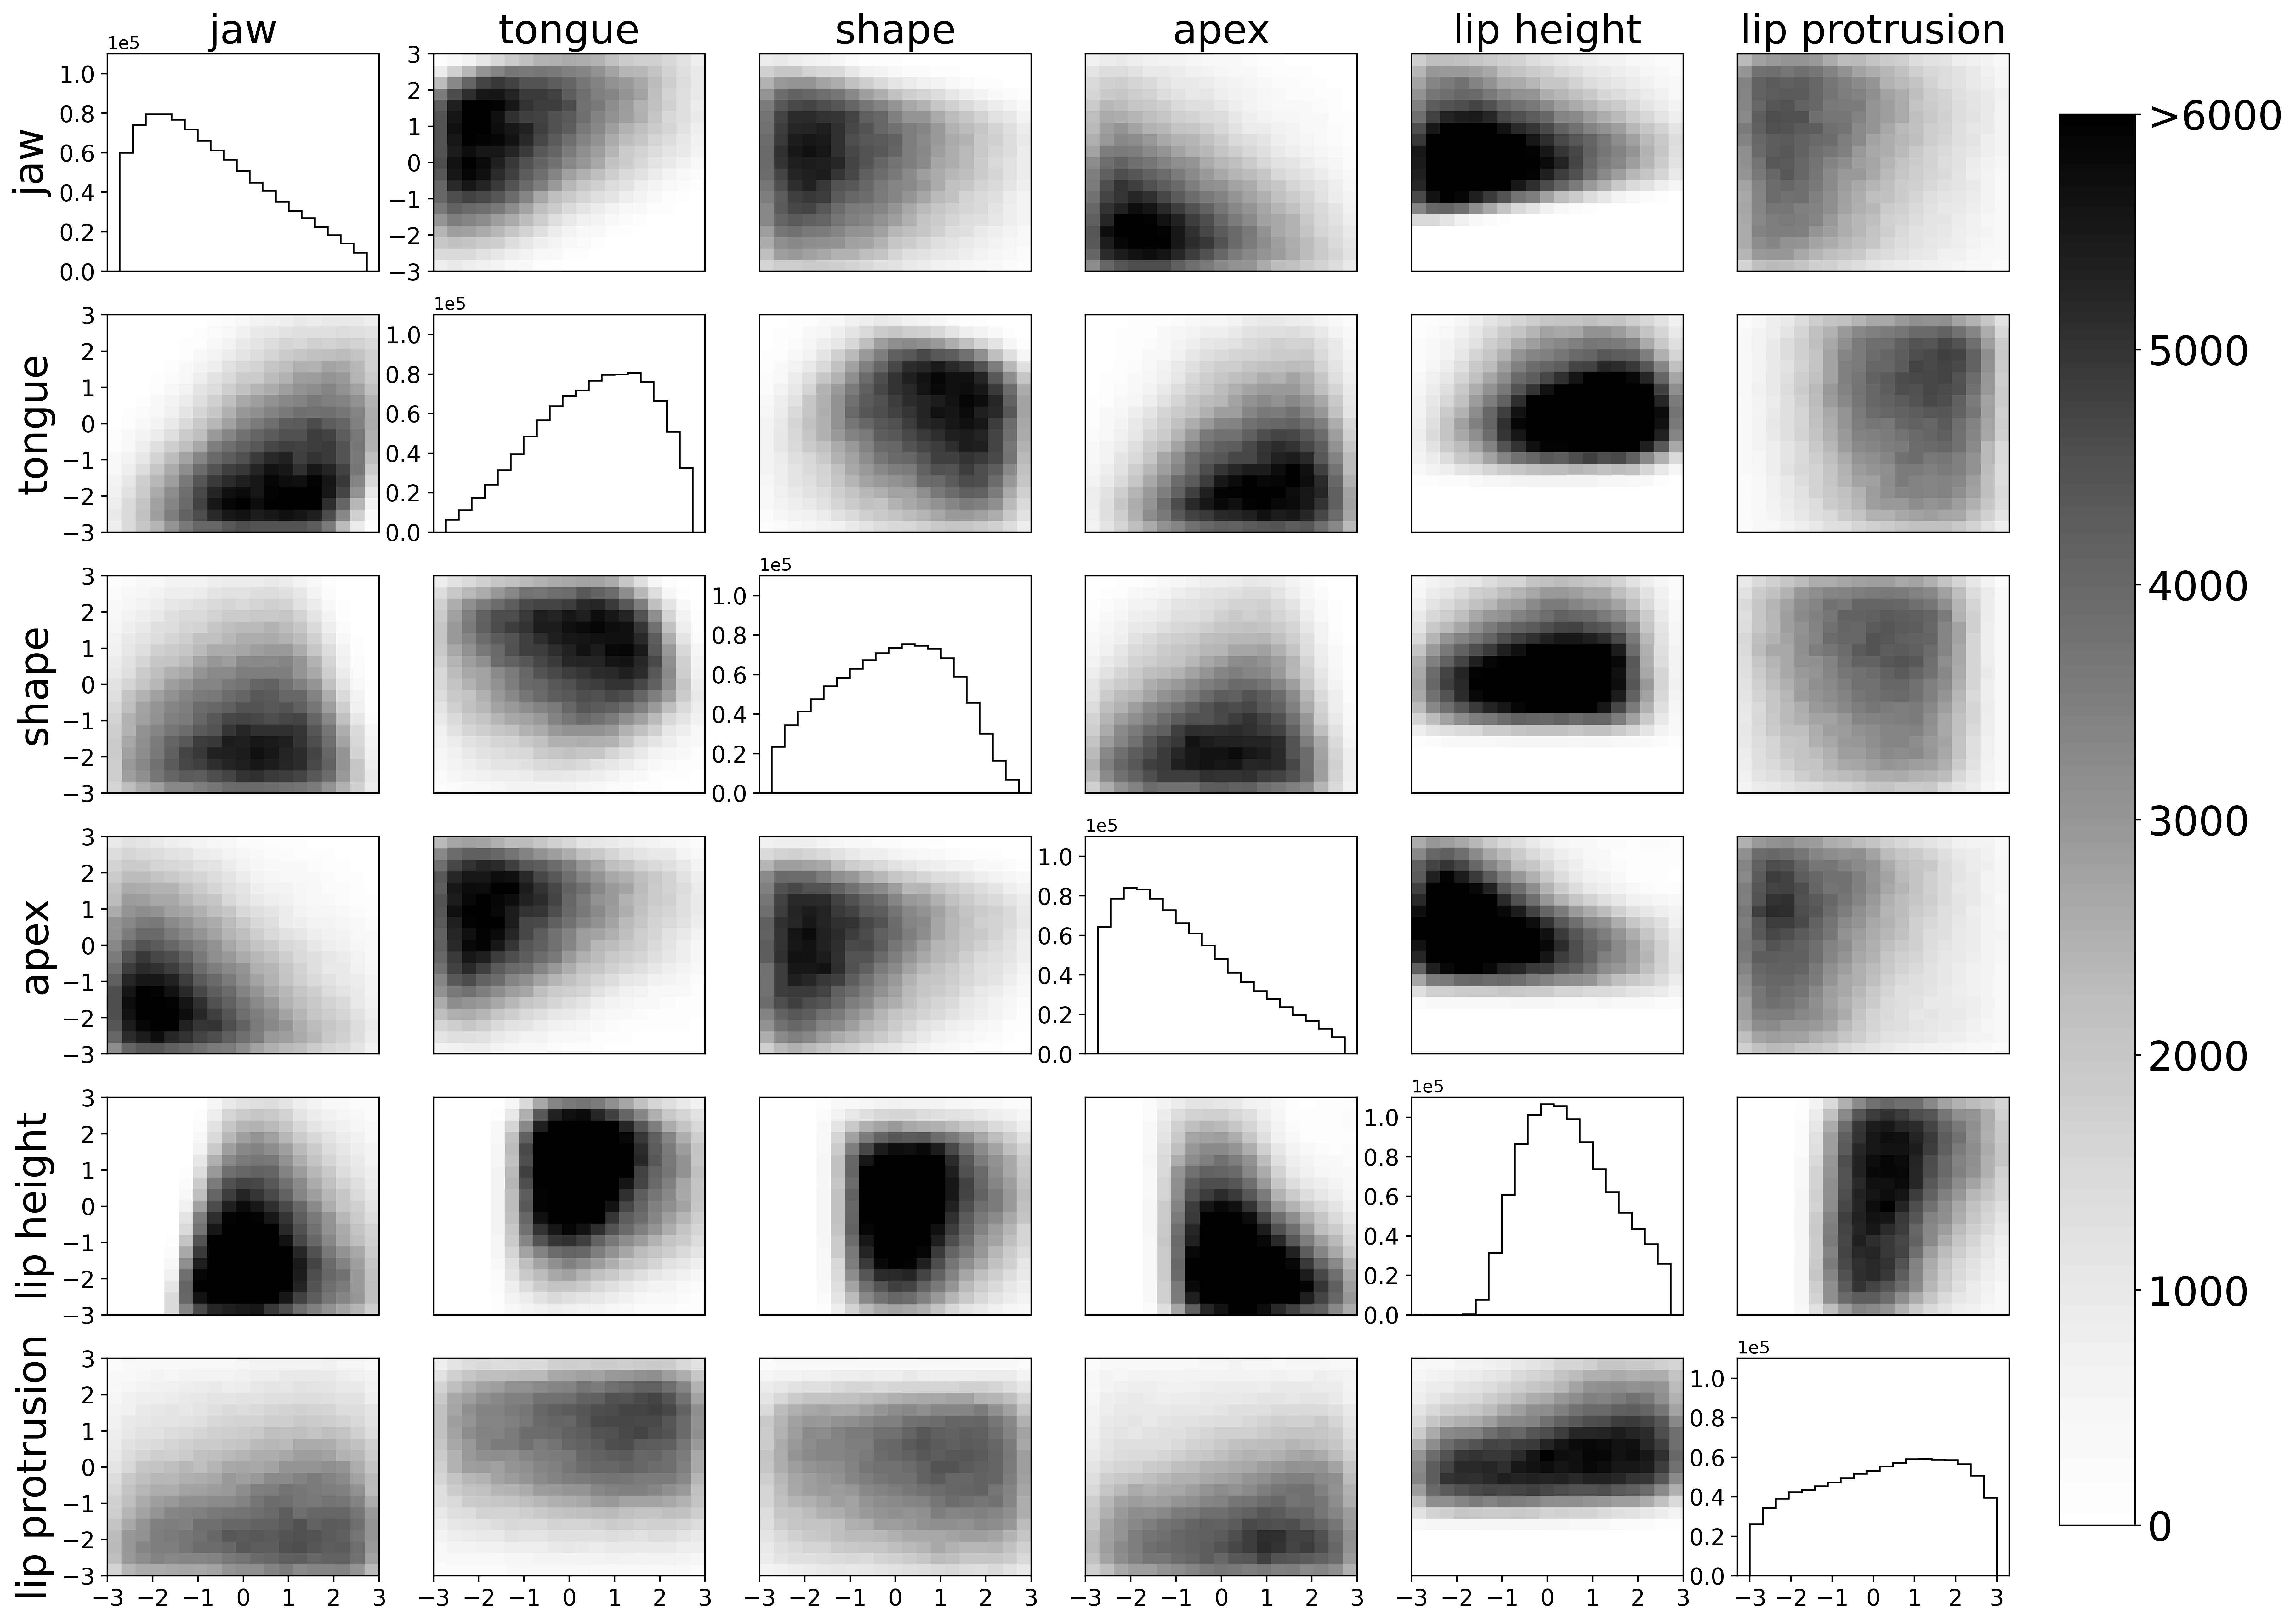

In [4]:
# visualize the density of valid combinations for each pair of articulatory parameters
def two_d_maeda_params(df):
    fig, axes = plt.subplots(nrows=len(df.columns), ncols=len(df.columns), figsize=(20, 16),dpi=400)
    for i,am1 in enumerate(df.columns):
        for j,am2 in enumerate(df.columns):
            ax = axes[i][j]
            if am1 == am2:
                ax.hist(df[am1],bins=np.linspace(-3,3,20),histtype='step',color='black')
                ax.set_ylim([0,110000])
            else:
                h = ax.hist2d(df[am1],df[am2],bins=np.linspace(-3,3,20),cmap=plt.cm.Greys,vmin=0,vmax=6000)
                ax.set_ylim([-3,3])
            ax.set_xticks(ticks=[])
            ax.set_yticks(ticks=[])
            ax.tick_params(axis='both', which='major', labelsize=13)
    cols = df.columns
    rows = df.columns
    txt_size = 23
    for ax, col in zip(axes[0], cols):
        ax.set_title(col,size=txt_size)
    for ax, row in zip(axes[0:,0], rows):
        ax.set_ylabel(row,size=txt_size)
        ax.set_yticks(ticks=range(-3,4))
    for i in range(len(cols)):
        axes[i,i].set_yticks(ticks=range(0,110000,20000))
        axes[i,i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    axes[0,1].set_yticks(ticks=range(-3,4))
    for ax, col in zip(axes[-1],cols):
        ax.set_xticks(ticks=range(-3,4))
    fig.subplots_adjust(right=0.88)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(h[3], cax=cbar_ax)
    cbar.ax.tick_params(labelsize=txt_size)
    cbar.ax.set_yticklabels(['0', '1000', '2000','3000','4000','5000','>6000'])
    plt.savefig(write_path + '2dhist.png', format='png', dpi=400)
    plt.show()
two_d_maeda_params(AMs_rw)

In [5]:
# Across each Maeda parameter, visualize the change in distribution for each task parameter
def dist_across_task_params(ams_df,task_params_df,bw_method=None):
    cmap = plt.cm.Oranges
    cmaplist = [cmap(i) for i in range(cmap.N)]
    #color_list = ['#2A1E5C','#432A58','#583654','#8C4E4B','#BD6643','#D5723F','#ED7D3A']
    tasks = ['TTCL','TTCD','TBCL','TBCD']
    fig, axes = plt.subplots(nrows=len(tasks), ncols=len(ams_df.columns), figsize=(18, 9))
    for i,am in enumerate(ams_df.columns):
        for j,t in enumerate(tasks):
            ax = axes[j][i]
            ax.set_xlabel(t,size=17)
            ax.set_ylabel('Density',size=17)
            c = 2
            vals = np.sort(list(set(ams_df[am])))
            for val in vals:
                task_params_sub = task_params_df[ams_df[am] == val]
                sns.kdeplot(ax=ax,data=task_params_sub[t],legend=False,label=val,bw_method=bw_method,
                            color=cmaplist[int(c*len(cmaplist)/9)])
                c += 1
    cols = ams_df.columns
    rows = tasks
    for ax, col in zip(axes[0], cols):
        ax.set_title(col,size=30)
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row,size=25)
    leg = fig.legend(bbox_to_anchor=(1.04,0.5), loc="center", borderaxespad=0,prop={'size': 15},
               labels=['-3.0','-2.0','-1.0','0.0','1.0','2.0','3.0'])
    for line in leg.get_lines():
        line.set_linewidth(8.0)
    plt.tight_layout()
    fig.savefig(write_path + 'density_plots.pdf', format='pdf', dpi=600,bbox_inches='tight')
    plt.show()

(898755, 6)


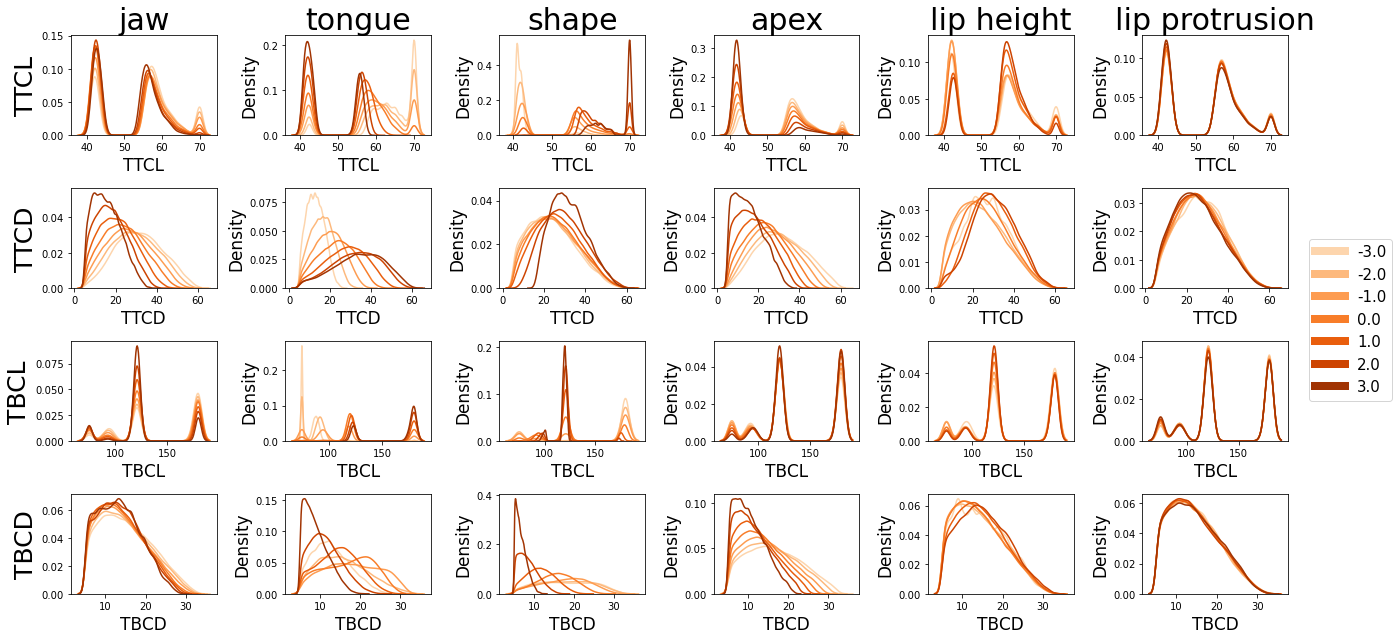

In [7]:
AMs_rw_discrete = round(AMs_rw)
columns = AMs_rw_discrete.columns
for col in columns:
    AMs_rw_discrete.drop(AMs_rw_discrete[AMs_rw_discrete[col] < -3].index, inplace = True)
    AMs_rw_discrete.drop(AMs_rw_discrete[AMs_rw_discrete[col] > 3].index, inplace = True)
print(AMs_rw_discrete.shape)
formants_rw_discrete = formants_rw.iloc[AMs_rw_discrete.index,:]
task_params_rw_discrete = task_params_rw.iloc[AMs_rw_discrete.index,:]
AMs_rw_discrete.reset_index(inplace=True,drop=True)
formants_rw_discrete.reset_index(inplace=True,drop=True)
task_params_rw_discrete.reset_index(inplace=True,drop=True)
AMs_rw_discrete
dist_across_task_params(AMs_rw_discrete,task_params_rw_discrete,bw_method=0.1)

In [10]:
def vocal_tract_median(maeda_df,task_params_df,task_params_col,slice_min,slice_max,ax,max_n_lines=5000,color='gray',x_offset=0,y_offset=0):
    TC = np.array([1,1,0,0], 'float32')
    PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
    anc = 0.0
    AM_slice = maeda_df.loc[(task_params_df[task_params_col] >= slice_min) & (task_params_df[task_params_col] <= slice_max)]
    internal_x_ac = np.zeros((AM_slice.shape[0],29))
    internal_y_ac = np.zeros((AM_slice.shape[0],29))
    external_x_ac = np.zeros((AM_slice.shape[0],29))
    external_y_ac = np.zeros((AM_slice.shape[0],29))
    j = 0
    #fig = plt.figure(figsize = (5,5))
    #ax = fig.add_subplot(1,1,1)
    ax.axis('off')
    for i in AM_slice.index:
        AM = np.array(maeda_df.loc[i], 'float32')
        formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM,anc)
        internal_x_ac[j,:] = internal_x-10
        internal_y_ac[j,:] = internal_y-10
        external_x_ac[j,:] = external_x-10
        external_y_ac[j,:] = external_y-10
        j += 1
        ax.plot(internal_x-10,internal_y-10,color='gray',alpha = 0.05)
        ax.plot(external_x-10,external_y-10,color='black')
        if j > max_n_lines:
            break
    rad = 9.5
    x1 = -rad * np.sin((90-slice_min)/360 * 2 * np.pi)
    y1 = rad * np.sin(slice_min/360 * 2 * np.pi)
    x2 = -rad * np.sin((90-slice_max)/360 * 2 * np.pi)
    y2 = rad * np.sin(slice_max/360 * 2 * np.pi)
    pts = np.array([[0,0],[x1,y1],[x2,y2]])
    triangle = Polygon(pts,closed=True,facecolor=color)
    ax.add_patch(triangle)
    ax.annotate(str(slice_min) + '°',xy=(x1,y1),xytext=(x1+x_offset,y1+y_offset),fontsize=13)
    ax.annotate(str(slice_max) + '°',xy=(x2,y2),fontsize=13)
    ax.set_xlim([-12,12])
    ax.set_ylim([-11,11])
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.title(task_params_col + ' = ' + str(slice_min) + ' to ' + str(slice_max))
    #plt.savefig(write_path + task_params_col + '_' + str(slice_min) + '-' + str(slice_max) + '.pdf', format='pdf', dpi=600)
    #plt.show()
int_color_list = ['red','yellow']
ext_color_list = ['black','black']
n = 500
#vocal_tract_median(AMs_rw,task_params_rw,'TBCL',170,180,max_n_lines=n,color='#2d7e26',y_offset=-0.2)
#vocal_tract_median(AMs_rw,task_params_rw,'TBCL',115,130,max_n_lines=n,color='#2d7e26')
#vocal_tract_median(AMs_rw,task_params_rw,'TBCL',85,105,max_n_lines=n,color='#2d7e26',x_offset=-0.5,y_offset=0.3)

In [7]:
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',40,45,max_n_lines=n,color='#EF9D06',x_offset=-0.7,y_offset=-0.7)
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',54,65,max_n_lines=n,color='#EF9D06',x_offset=-1.2,y_offset=-0.2)

TypeError: vocal_tract_median() missing 1 required positional argument: 'ax'

In [ ]:
def vocal_tract_trajectory(AM_slice):
    AM_slice_copy = AM_slice.copy()
    del AM_slice_copy['RW']
    TC = np.array([1,1,0,0], 'float32')
    PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
    anc = 0.0
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i,index in enumerate(AM_slice_copy.index):
        AM_base = np.zeros(7,dtype='float32')
        AM = np.array(AM_slice_copy.iloc[i,:], 'float32')
        AM_base[0:len(AM)] = AM
        formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM_base,anc)
        color = i/AM_slice.shape[0]
        ax.plot(internal_x-10,internal_y-10,color=(1-color,0,color))
        ax.plot(external_x-10,external_y-10,color='black')
    ax.set_xlim([-14,14])
    ax.set_ylim([-9,9])
    plt.title('Random Walk')
    plt.show()

In [13]:
# visualize the spread of each formant as a function of each task parameter
color_list = ['#B17EC9','#81429E','#3B1E48']
def formant_spread_by_task_param(formants_df,task_params_df,ax,col_to_plot='TTCL',legend=True):
    label_size = 14
    title_size = 15
    which_formants = np.array([3,2,1])
    #fig = plt.figure(figsize=(15,7))
    i = 1
    #fig = plt.figure(figsize=(12,3),dpi=600)
    if 'CL' in col_to_plot:
        #ax = fig.add_subplot(1,2,1)
        ax2 = ax.twinx()
        ax.set_xlabel('Constriction Location (deg)',fontsize=label_size)
        #ax2.set_xlabel('test')
        if 'TT' in col_to_plot:
            ax.set_title('Tongue Tip Constriction Location',fontsize=title_size)
        if 'TB' in col_to_plot:
            ax.set_title('Tongue Body Constriction Location',fontsize=title_size)
    if 'CD' in col_to_plot:
        #ax = fig.add_subplot(1,2,2)
        ax2 = ax.twinx()
        ax.set_xlabel('Constriction Degree (mm)',fontsize=label_size)
        ax.set_xlim([0,75])
        #ax2.set_xlabel('test')
        if 'TT' in col_to_plot:
            ax.set_title('Tongue Tip Constriction Degree',fontsize=title_size)
        if 'TB' in col_to_plot:
            ax.set_title('Tongue Body Constriction Degree',fontsize=title_size)
    c = 0
    for f in formants_df.columns[which_formants-1]:
        ax.scatter(task_params_df[col_to_plot],formants_df[f],color=color_list[c],marker='.',label='Formant '+str(f+1),s=5)
        sns.kdeplot(task_params_df[col_to_plot],bw_method=0.06,color='black')
        c += 1
    mn = task_params_df[col_to_plot].min()
    mx = task_params_df[col_to_plot].max()
    ax.set_xlim([mn-0.05*(mx-mn),mx+0.05*(mx-mn)])
    i += 1
    ax.set_ylabel('Formant Freq (Hz)',fontsize=label_size)
    ax2.set_ylabel('Density',fontsize=label_size)
    ax.set_yticks(range(0, 4000, 1000))
    start, end = ax2.get_ylim()
    ax2.yaxis.set_ticks(np.round(np.arange(start, end, (end-start)/3.5),2))
    if legend:
        ax.legend(bbox_to_anchor=(1.15, 0.3),markerscale=10,fontsize=12)
    #plt.tight_layout(w_pad=2)
    #plt.savefig(write_path + col_to_plot + '.png', format='png', dpi=600)
    #plt.show()
    return ax
#formant_spread_by_task_param(formants_rw,task_params_rw,cols_to_plot=['TTCL','TTCD'])
#formant_spread_by_task_param(formants_rw,task_params_rw,cols_to_plot=['TBCL','TBCD'])

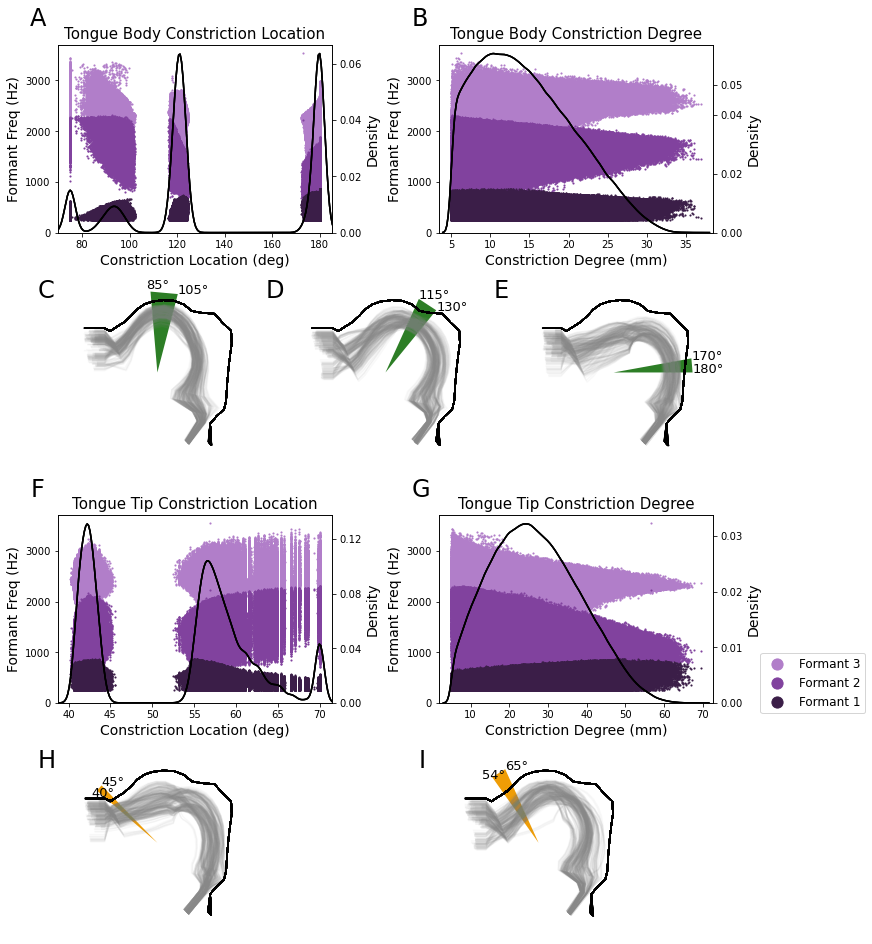

In [15]:
fig3 = plt.figure(constrained_layout=True, figsize = [12,13])
int_color_list = ['red','yellow']
ext_color_list = ['black','black']
n = 500
gs = fig3.add_gridspec(4, 6)
f3_ax1 = fig3.add_subplot(gs[0, 0:3])
formant_spread_by_task_param(formants_rw,task_params_rw,f3_ax1,col_to_plot='TBCL',legend=False)
f3_ax1.text(-0.1,1.1,'A',transform=f3_ax1.transAxes,size=24)
f3_ax2 = fig3.add_subplot(gs[0, 3:6])
formant_spread_by_task_param(formants_rw,task_params_rw,f3_ax2,col_to_plot='TBCD',legend=False)
f3_ax2.text(-0.1,1.1,'B',transform=f3_ax2.transAxes,size=24)
f3_ax3 = fig3.add_subplot(gs[1, 0:2])
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',85,105,max_n_lines=n,ax=f3_ax3,color='#2d7e26',x_offset=-0.5,y_offset=0.3)
f3_ax3.text(-0.1,0.9,'C',transform=f3_ax3.transAxes,size=24)
f3_ax4 = fig3.add_subplot(gs[1, 2:4])
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',115,130,max_n_lines=n,ax=f3_ax4,color='#2d7e26')
f3_ax4.text(-0.1,0.9,'D',transform=f3_ax4.transAxes,size=24)
f3_ax5 = fig3.add_subplot(gs[1, 4:6])
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',170,180,max_n_lines=n,ax=f3_ax5,color='#2d7e26',y_offset=-0.2)
f3_ax5.text(-0.1,0.9,'E',transform=f3_ax5.transAxes,size=24)
f3_ax6 = fig3.add_subplot(gs[2, 0:3])
formant_spread_by_task_param(formants_rw,task_params_rw,f3_ax6,col_to_plot='TTCL',legend=False)
f3_ax6.text(-0.1,1.1,'F',transform=f3_ax6.transAxes,size=24)
f3_ax7 = fig3.add_subplot(gs[2, 3:6])
formant_spread_by_task_param(formants_rw,task_params_rw,f3_ax7,col_to_plot='TTCD',legend=True)
f3_ax7.text(-0.1,1.1,'G',transform=f3_ax7.transAxes,size=24)
f3_ax8 = fig3.add_subplot(gs[3, 0:2])
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',40,45,max_n_lines=n,ax=f3_ax8,color='#EF9D06',x_offset=-0.7,y_offset=-0.7)
f3_ax8.text(-0.1,0.9,'H',transform=f3_ax8.transAxes,size=24)
f3_ax9 = fig3.add_subplot(gs[3, 3:5])
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',54,65,max_n_lines=n,ax=f3_ax9,color='#EF9D06',x_offset=-1.2,y_offset=-0.2)
f3_ax9.text(-0.1,0.9,'I',transform=f3_ax9.transAxes,size=24)
plt.savefig(write_path + 'Fig2.png', format='png', dpi=600)
#plt.savefig(write_path + 'Fig2.pdf', format='pdf', dpi=600)
plt.show()